23083010024_Tugas 5 EDA Kelas A

FEMALES DIABETES DATABASE FROM INDIA

Dataset ini berasal dari National Institute of Diabetes and Digestive and Kidney Diseases. Tujuan dari dataset ini adalah untuk secara diagnostik memprediksi apakah seorang pasien memiliki diabetes, berdasarkan beberapa pengukuran diagnostik yang termasuk dalam dataset. Beberapa batasan diterapkan pada pemilihan data ini dari basis data yang lebih besar. Secara khusus, semua pasien di sini adalah wanita berusia minimal 21 tahun dengan keturunan Pima Indian.

Berikut variabel-variabel yang ada dalam diabetes dataset ini

Pregnancies (Kehamilan): Rasio - Karena jumlah kehamilan adalah bilangan bulat, memiliki jarak yang konsisten antar nilai, dan ada titik nol yang berarti (tidak pernah hamil).

Glucose (Glukosa): Rasio - Mengukur kadar glukosa dalam darah, yang memiliki jarak yang konsisten dan titik nol yang berarti (tidak ada glukosa).

BloodPressure (Tekanan Darah): Rasio - Karena tekanan darah diukur dalam satuan yang memiliki nol yang sebenarnya dan jarak yang konsisten.

SkinThickness (Ketebalan Kulit): Rasio - Mengukur ketebalan kulit dalam milimeter, memiliki titik nol dan jarak konsisten.

Insulin: Rasio - Kadar insulin dalam darah, memiliki nilai nol yang berarti dan jarak konsisten.

BMI (Indeks Massa Tubuh): Rasio - Menghitung rasio antara berat badan dan tinggi badan kuadrat, dengan titik nol dan jarak konsisten.

DiabetesPedigreeFunction: Rasio - Sebuah skor numerik yang mewakili kemungkinan diabetes berdasarkan sejarah keluarga. Meskipun secara teknis ini adalah hasil dari fungsi dan bisa dianggap sebagai rasio karena memiliki jarak yang konsisten dan titik nol.

Age (Usia): Rasio - Karena usia memiliki titik nol yang bermakna dan jarak antar data yang konsisten.

Outcome (Hasil): Nominal - Ini adalah kategori (apakah individu tersebut memiliki diabetes atau tidak), sehingga termasuk dalam skala nominal.

In [49]:
import pandas as pd

df = pd.read_csv('D:/SEMESTER 3/EDA/data diabetessss.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


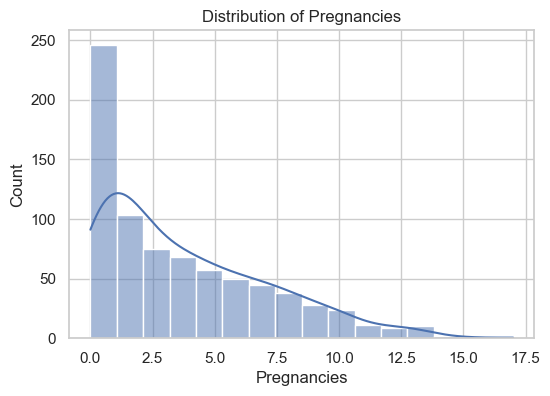

Pregnancies is categorized as Binomial distribution.

Statistics for Pregnancies:
Mean: 3.845
Median: 3.000
Mode: 1.000
Variance: 11.354
Standard Deviation: 3.370
Skewness: 0.902
Kurtosis: 0.159



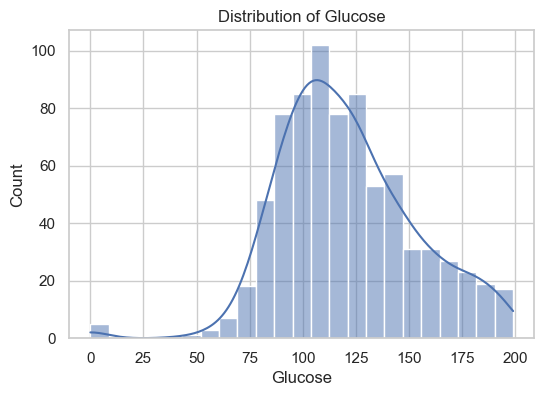

Glucose is categorized as Unknown distribution.

Statistics for Glucose:
Mean: 120.895
Median: 117.000
Mode: 99.000
Variance: 1022.248
Standard Deviation: 31.973
Skewness: 0.174
Kurtosis: 0.641



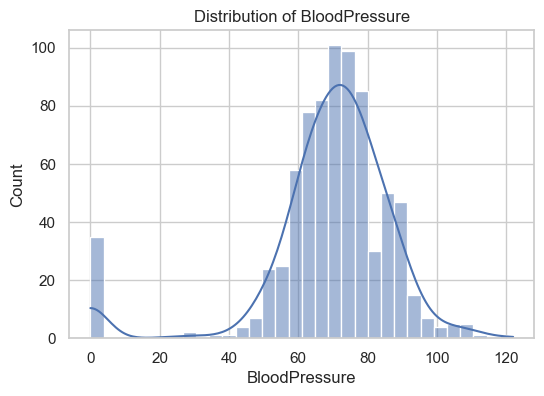

BloodPressure is categorized as Unknown distribution.

Statistics for BloodPressure:
Mean: 69.105
Median: 72.000
Mode: 70.000
Variance: 374.647
Standard Deviation: 19.356
Skewness: -1.844
Kurtosis: 5.180



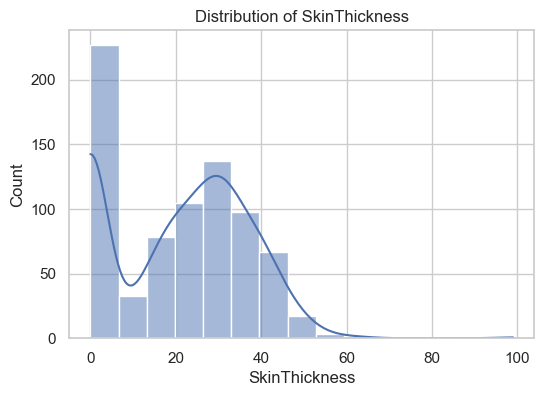

SkinThickness is categorized as Unknown distribution.

Statistics for SkinThickness:
Mean: 20.536
Median: 23.000
Mode: 0.000
Variance: 254.473
Standard Deviation: 15.952
Skewness: 0.109
Kurtosis: -0.520



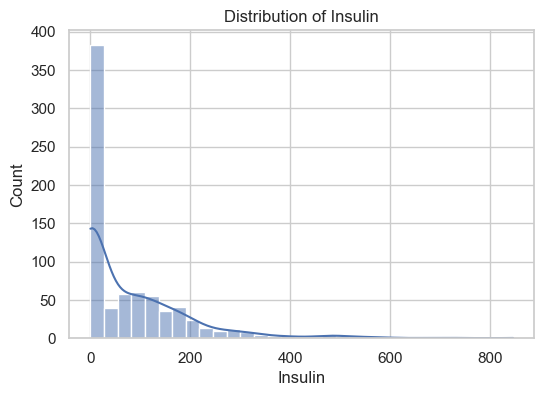

Insulin is categorized as Exponential distribution.

Statistics for Insulin:
Mean: 79.799
Median: 30.500
Mode: 0.000
Variance: 13281.180
Standard Deviation: 115.244
Skewness: 2.272
Kurtosis: 7.214



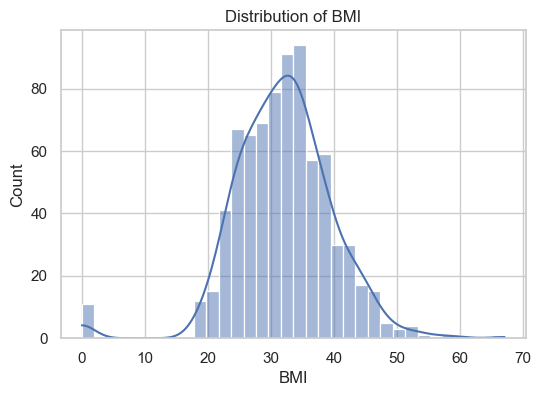

BMI is categorized as Unknown distribution.

Statistics for BMI:
Mean: 31.993
Median: 32.000
Mode: 32.000
Variance: 62.160
Standard Deviation: 7.884
Skewness: -0.429
Kurtosis: 3.290



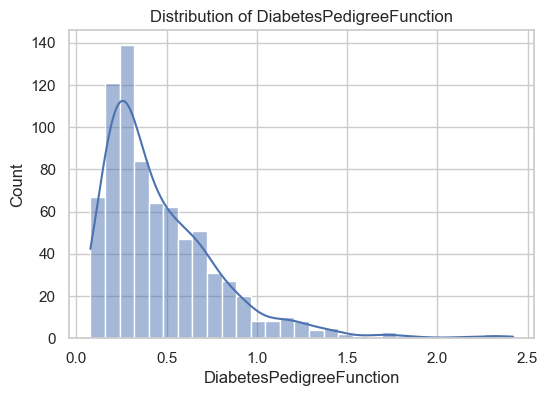

DiabetesPedigreeFunction is categorized as Exponential distribution.

Statistics for DiabetesPedigreeFunction:
Mean: 0.472
Median: 0.372
Mode: 0.254
Variance: 0.110
Standard Deviation: 0.331
Skewness: 1.920
Kurtosis: 5.595



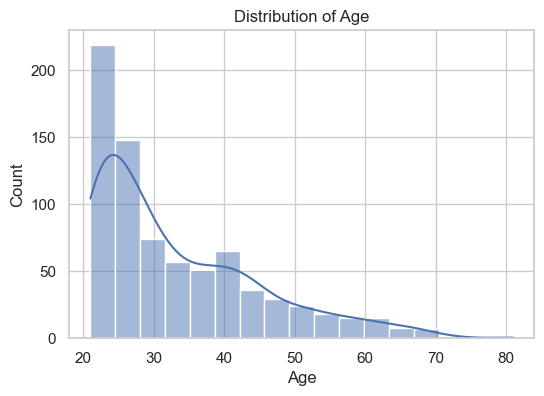

Age is categorized as Unknown distribution.

Statistics for Age:
Mean: 33.241
Median: 29.000
Mode: 22.000
Variance: 138.303
Standard Deviation: 11.760
Skewness: 1.130
Kurtosis: 0.643



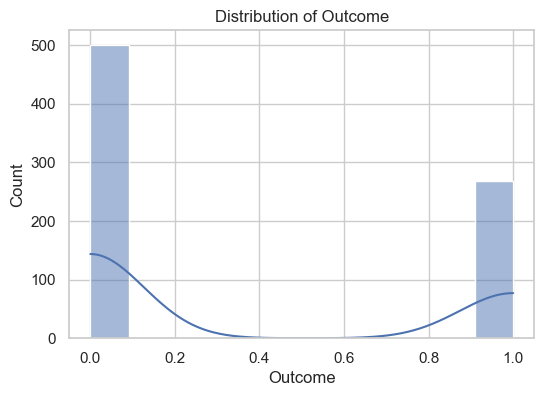

Outcome is categorized as Binomial distribution.

Statistics for Outcome:
Mean: 0.349
Median: 0.000
Mode: 0.000
Variance: 0.227
Standard Deviation: 0.477
Skewness: 0.635
Kurtosis: -1.601



In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

df = pd.read_csv('D:/SEMESTER 3/EDA/data diabetessss.csv')

variables = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

def categorize_distribution(var, data):
    k2, p = stats.normaltest(data.dropna())
    skewness = data.skew()
    kurtosis = data.kurtosis()

    if p > 0.05 and abs(skewness) < 0.5 and 2.5 < kurtosis < 3.5:
        return 'Normal'
    elif skewness > 1 and kurtosis > 3:
        return 'Exponential'
    elif abs(skewness) < 0.5 and abs(kurtosis) < 0.5:
        return 'Uniform'
    elif var == 'Outcome' or var == 'Pregnancies': 
        return 'Binomial'
    else:
        return 'Unknown'

for var in variables:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[var], kde=True)
    plt.title(f'Distribution of {var}')
    plt.show()

    distribution_type = categorize_distribution(var, df[var])
    print(f'{var} is categorized as {distribution_type} distribution.\n')

    mean = df[var].mean()
    median = df[var].median()
    mode = df[var].mode()[0]
    variance = df[var].var()
    std_dev = df[var].std()
    skewness = df[var].skew()
    kurtosis = df[var].kurtosis()

    print(f'Statistics for {var}:')
    print(f'Mean: {mean:.3f}')
    print(f'Median: {median:.3f}')
    print(f'Mode: {mode:.3f}')
    print(f'Variance: {variance:.3f}')
    print(f'Standard Deviation: {std_dev:.3f}')
    print(f'Skewness: {skewness:.3f}')
    print(f'Kurtosis: {kurtosis:.3f}\n')

1. Pregnancies

Binomial Distribution: Karena variabel ini mencatat jumlah kehamilan dalam populasi tertentu (dapat dianggap sebagai percobaan yang sukses atau gagal)

2. Glucose

Unknown: Meskipun data Glucose tidak sepenuhnya mengikuti distribusi normal, karakteristik statistiknya menunjukkan bahwa distribusi tersebut mendekati normal dengan sedikit skewness positif dan kurtosis yang rendah.

3. BloodPressure

Unknown: Dengan mempertimbangkan hasil skewness yang signifikan dan kurtosis yang tinggi, distribusi BloodPressure dapat dikategorikan sebagai unknown karena tidak mengikuti distribusi normal (p-value < 0.05).

4. SkinThickness

Unknown: karena mode yang sangat rendah dan p-value dari uji normalitas menunjukkan bahwa distribusi tidak sepenuhnya normal.

5. Insulin

Exponential Distribution: Kadar insulin sering kali mengikuti pola yang tidak seimbang, di mana sebagian besar individu memiliki kadar rendah dan sedikit individu memiliki kadar tinggi, menjadikannya sesuai dengan distribusi eksponensial.

6. BMI

Unknown: karena meskipun mendekati distribusi normal, hasil uji normalitas menunjukkan ketidaksesuaian.

7. DiabetesPedigreeFunction

Exponential Distribution: Pola yang mirip dengan kadar insulin, dengan kebanyakan individu memiliki nilai rendah dan beberapa individu memiliki nilai yang tinggi, menunjukkan distribusi eksponensial.

8. Age

Unknown: karena meskipun ada pola distribusi yang bisa diidentifikasi, p-value dari uji normalitas menunjukkan bahwa distribusi tidak memenuhi syarat untuk kategori distribusi yang jelas.

9. Outcome

Binomial Distribution: Variabel ini mencerminkan hasil dari kondisi biner (diabetes ya/tidak) dan dapat dianggap sebagai percobaan sukses/gagal, sehingga sesuai dengan distribusi binomial.

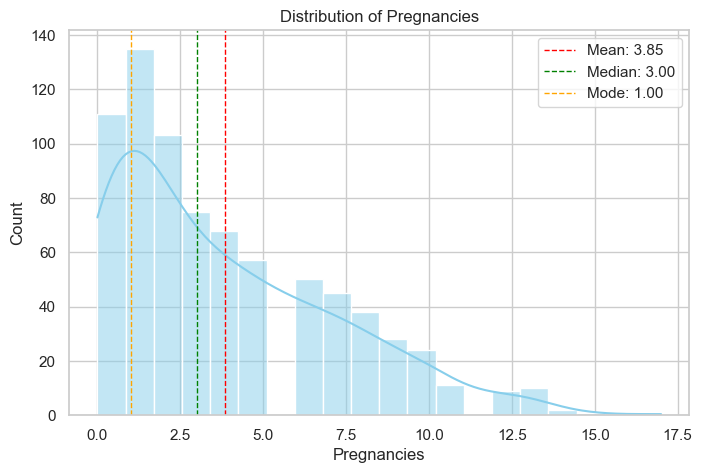

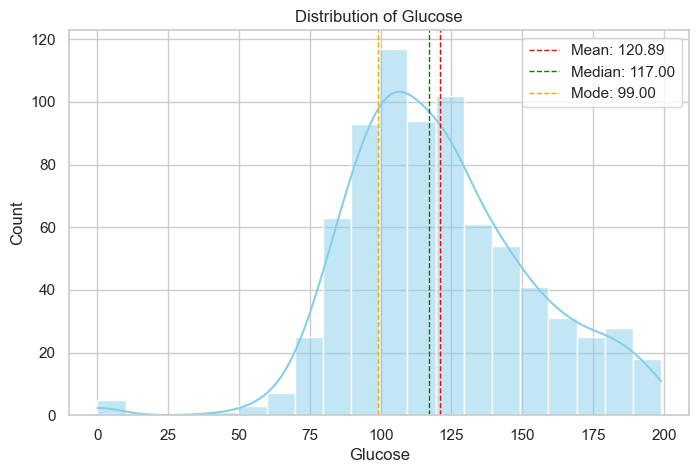

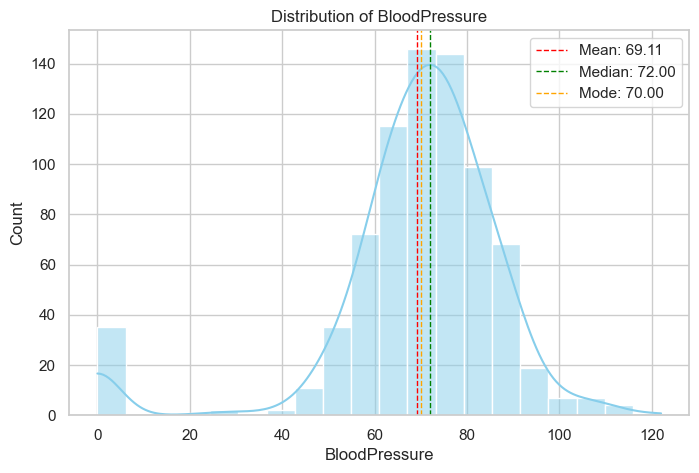

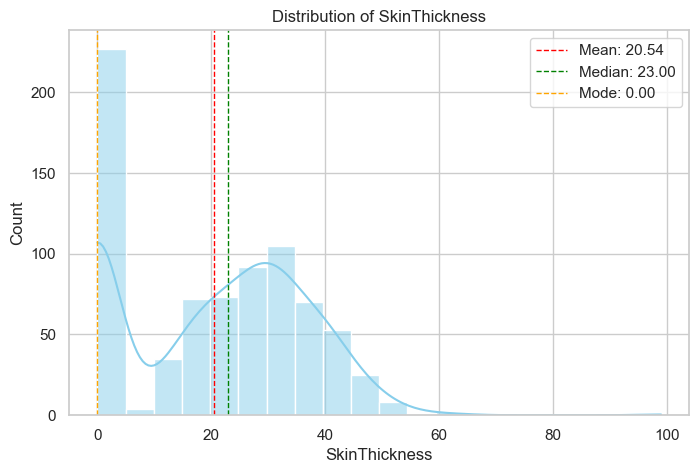

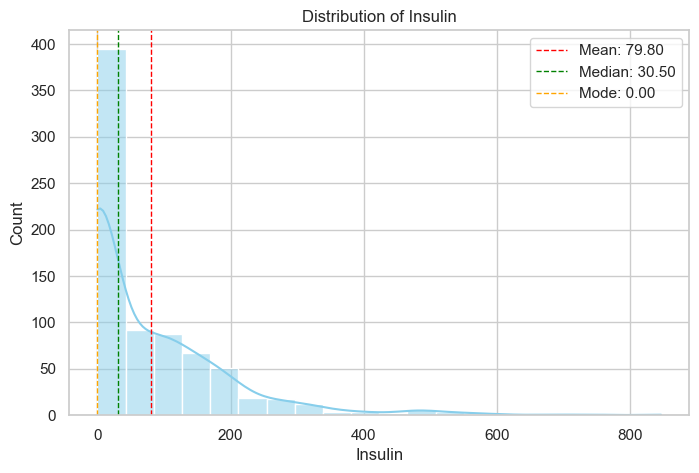

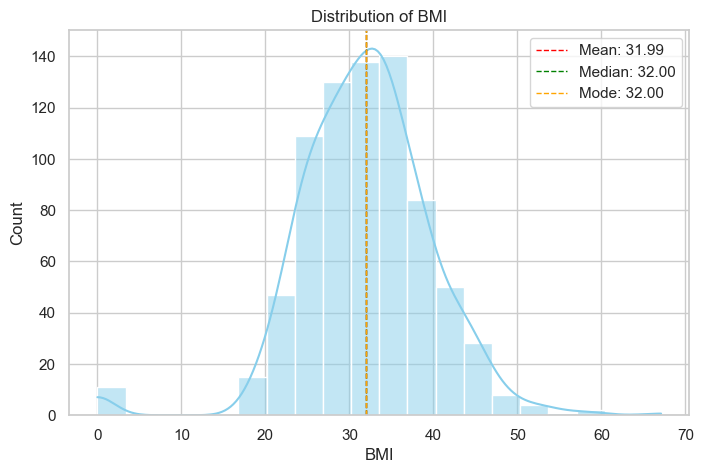

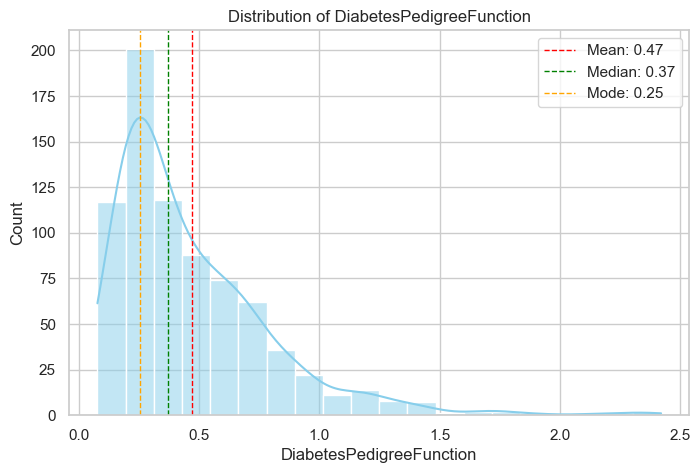

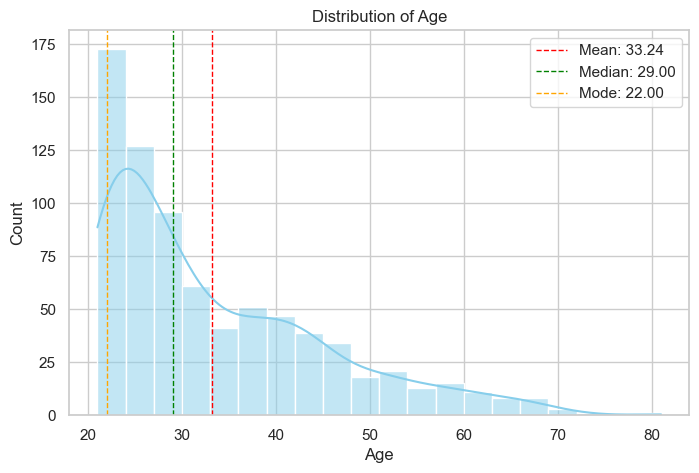

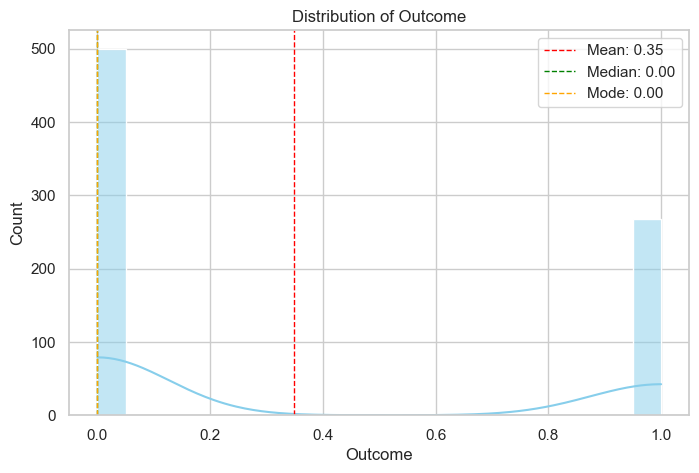


Variable: Pregnancies
Mean: 3.845
Median: 3.000
Mode: 1.000
Variance: 11.354
Standard Deviation: 3.370
Skewness: 0.902

Variable: Glucose
Mean: 120.895
Median: 117.000
Mode: 99.000
Variance: 1022.248
Standard Deviation: 31.973
Skewness: 0.174

Variable: BloodPressure
Mean: 69.105
Median: 72.000
Mode: 70.000
Variance: 374.647
Standard Deviation: 19.356
Skewness: -1.844

Variable: SkinThickness
Mean: 20.536
Median: 23.000
Mode: 0.000
Variance: 254.473
Standard Deviation: 15.952
Skewness: 0.109

Variable: Insulin
Mean: 79.799
Median: 30.500
Mode: 0.000
Variance: 13281.180
Standard Deviation: 115.244
Skewness: 2.272

Variable: BMI
Mean: 31.993
Median: 32.000
Mode: 32.000
Variance: 62.160
Standard Deviation: 7.884
Skewness: -0.429

Variable: DiabetesPedigreeFunction
Mean: 0.472
Median: 0.372
Mode: 0.254
Variance: 0.110
Standard Deviation: 0.331
Skewness: 1.920

Variable: Age
Mean: 33.241
Median: 29.000
Mode: 22.000
Variance: 138.303
Standard Deviation: 11.760
Skewness: 1.130

Variable: Out

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

df = pd.read_csv('D:/SEMESTER 3/EDA/data diabetessss.csv')

variables = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

results = {}

sns.set(style="whitegrid")

for var in variables:
    mean = df[var].mean()
    median = df[var].median()
    mode = df[var].mode()[0]
    variance = df[var].var()
    std_dev = df[var].std()
    skewness = df[var].skew()

    results[var] = {
        'Mean': mean,
        'Median': median,
        'Mode': mode,
        'Variance': variance,
        'Standard Deviation': std_dev,
        'Skewness': skewness
    }
    
    plt.figure(figsize=(8, 5))
    sns.histplot(df[var], kde=True, bins=20, color='skyblue')
    
    plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean:.2f}')
    plt.axvline(median, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median:.2f}')
    plt.axvline(mode, color='orange', linestyle='dashed', linewidth=1, label=f'Mode: {mode:.2f}')
    
    plt.title(f'Distribution of {var}')
    plt.legend()
    plt.show()

for var, stats in results.items():
    print(f'\nVariable: {var}')
    for stat_name, value in stats.items():
        print(f'{stat_name}: {value:.3f}')